In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
import cv2
from glob import glob
data = glob('/kaggle/input/breast-histopathology-images/**/*.png', recursive=True)

In [5]:
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [6]:
x=np.stack(images)
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)
#normalize the data
x=x/255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [8]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import SeparableConv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [9]:
channelDim = -1
model=Sequential()
model.add(SeparableConv2D(32, (3,3), padding="same",input_shape=(100,100,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channelDim))
model.add(SeparableConv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channelDim))
model.add(SeparableConv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channelDim))
model.add(SeparableConv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))

In [10]:
model.compile(optimizer='Adagrad',loss='binary_crossentropy',metrics=['acc'])

In [11]:
history=model.fit(x,y,epochs=5,validation_split=0.5,batch_size=100)

Epoch 1/5
75/75 [==============================] - 14s 185ms/step - loss: 0.9943 - acc: 0.5908 - val_loss: 0.7130 - val_acc: 0.2693
Epoch 2/5
75/75 [==============================] - 12s 157ms/step - loss: 0.7945 - acc: 0.6723 - val_loss: 0.9562 - val_acc: 0.2693
Epoch 3/5
75/75 [==============================] - 12s 155ms/step - loss: 0.6861 - acc: 0.7135 - val_loss: 1.6996 - val_acc: 0.2693
Epoch 4/5
75/75 [==============================] - 12s 155ms/step - loss: 0.6217 - acc: 0.7349 - val_loss: 3.2198 - val_acc: 0.2693
Epoch 5/5
75/75 [==============================] - 12s 156ms/step - loss: 0.5586 - acc: 0.7685 - val_loss: 5.4032 - val_acc: 0.2693


In [12]:
loss,accuracy=model.evaluate(x_test,y_test)

94/94 [==============================] - 1s 7ms/step - loss: 5.3041 - acc: 0.2827


In [14]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib.plot'

In [13]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

NameError: name 'plt' is not defined

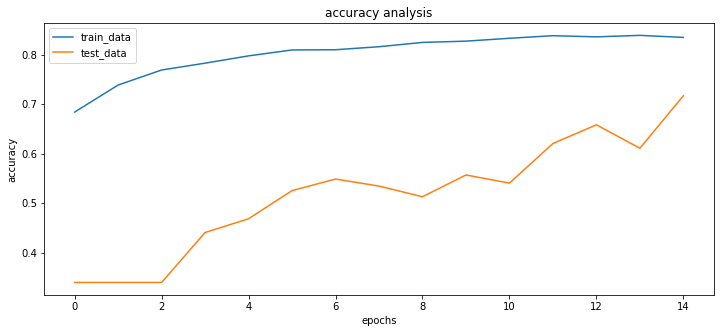

In [18]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()
